In [1]:
!pip install countryinfo
!pip install missingno
import pandas as pd
import numpy as np
import missingno as msno
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 16)

In [2]:
conda install opencv 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


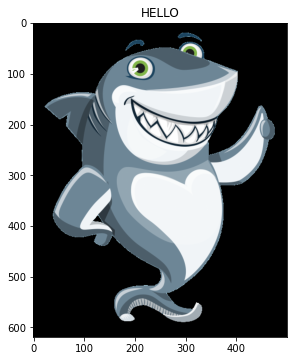

In [3]:
import cv2
binary = cv2.imread('kisspng.png')
binary.shape
plt.figure(figsize=[10,10])
plt.imshow(binary[:,:,::-1])
plt.subplot(122)
plt.imshow(binary[:,:,::-1])
plt.title("HELLO")
plt.show()

In [4]:
db = pd.read_csv('attacks.csv', encoding='cp1252')
len(db)

25723

## 1. First visualitation

In [5]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## 2. Drop duplicates rows

In [6]:
db.drop_duplicates()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Checking null data, how many empty cells there are in every column.

In [7]:
#True=1; suma los 1
null_cols = db.isnull().sum()
null_cols

Case Number       17021
Date              19421
Year              19423
Type              19425
Country           19471
                  ...  
Case Number.1     19421
Case Number.2     19421
original order    19414
Unnamed: 22       25722
Unnamed: 23       25721
Length: 24, dtype: int64

## 4. No duplicates, len remains the same (25,723)

In [8]:
len(db)

25723

## 5. Show columns of db that have NaN values

In [9]:
def null_cols(db):
    nulls = db.isna().sum()
    return nulls[nulls > 0] / len(db) * 100
null_cols(db)

Case Number       66.170353
Date              75.500525
Year              75.508300
Type              75.516075
Country           75.694903
                    ...    
Case Number.1     75.500525
Case Number.2     75.500525
original order    75.473312
Unnamed: 22       99.996112
Unnamed: 23       99.992225
Length: 24, dtype: float64

## 6. Deleting blank spaces

In [10]:
db.columns = db.columns.str.rstrip()
db['Sex']= db['Sex'].str.strip()
db['Country']= db['Country'].str.strip()
db['Age']= db['Age'].str.strip()
db['Case Number']= db['Case Number'].str.strip()
db['Fatal (Y/N)']= db['Fatal (Y/N)'].str.strip()
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Check if 'Case Number' contains the same info as "Case Number.1" & "Case Number.2"

In [11]:
((db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])).value_counts()

False    19448
True      6275
dtype: int64

In [12]:
db=db[(db["Case Number"] == db["Case Number.1"]) & (db["Case Number"] == db["Case Number.2"])]
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [13]:
db.reset_index()
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## 8. Unnamed: 22" and "Unnamed: 23" are mostly empty. Let's examine what they contain

In [14]:
db['Unnamed: 22'].fillna(0, inplace=True)
[x for x in db['Unnamed: 22'] if x!=0]

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


['stopped here']

In [15]:
db['Unnamed: 23'].fillna(0, inplace=True)
[y for y in db['Unnamed: 23'] if y!=0]

['Teramo', 'change filename']

### We will drop Unmamed:22, only contain 'stopped here'/ Unmamed:23, only contain 'Teramo' & 'change filename'

In [16]:
db.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace = True)

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 9. Let's check how many different values contain this two columns in order to drop one of them

In [17]:
(db["href formula"] != db["href"]).value_counts()

False    6216
True       59
dtype: int64

### Searching missing values in 'href formula' which is present in 'href':

In [18]:
((db["href formula"]).isna()).value_counts()

False    6274
True        1
Name: href formula, dtype: int64

In [19]:
((db["href"]).isnull()).value_counts()

False    6275
Name: href, dtype: int64

In [20]:
((db["href formula"] != db["href"]) & (db["href formula"]).isna()).value_counts()

False    6274
True        1
dtype: int64

### Dropping href

In [21]:
db.drop(columns = ["href"], inplace = True)

In [22]:
db[db['Case Number']==0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order


## 10. ‘all’ : If all values are NaN, drop that row or column.

In [23]:
db = db.dropna(how='all')
len(db)
#db = db.dropna() dropea todo si algún valor es NaN

6275

## 11. Reindexing dataframe

In [24]:
db.reset_index(drop=True)
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0


## 12. Let's have a look to Age and Sex columns

In [25]:
print(db['Age'].dtypes)

object


### Checking NaN rows

In [26]:
NaN_rows_Age=db["Age"].isna().sum()
print('NaN rows Age:')
print(NaN_rows_Age)
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)
db.Age.dropna(inplace=True)

NaN rows Age:
2815
2815


In [27]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [28]:
db['Age'] = db['Age'].str.replace('X', '')
db['Age'] = db['Age'].str.replace('\xa0', '')
db['Age'] = db['Age'].str.replace('MAKE LINE GREEN', '')
db['Age'] = db['Age'].str.replace('F', '')
db['Age'] = db['Age'].str.replace('A.M.', '')

In [29]:
def replace(Age):
    try:
        return int(Age)
    except:
        return None    

In [30]:
db['Age']=db.Age.map(replace)

In [31]:
#Country mode = USA. we can use this average Age to fillin empty rows in Age
Country_age_mean=db.groupby(by='Country').Age.mean()
Country_age_mean['USA']

26.76659822039699

In [34]:
db['Age'] = db['Age'].fillna(Country_age_mean['USA'])

In [35]:
def replace(Age):
    try:
        return int(Age)
    except:
        return None    

In [36]:
db['Age']=db.Age.map(replace)

In [37]:
print(set(db['Age']))

{1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 82, 84, 86, 87}


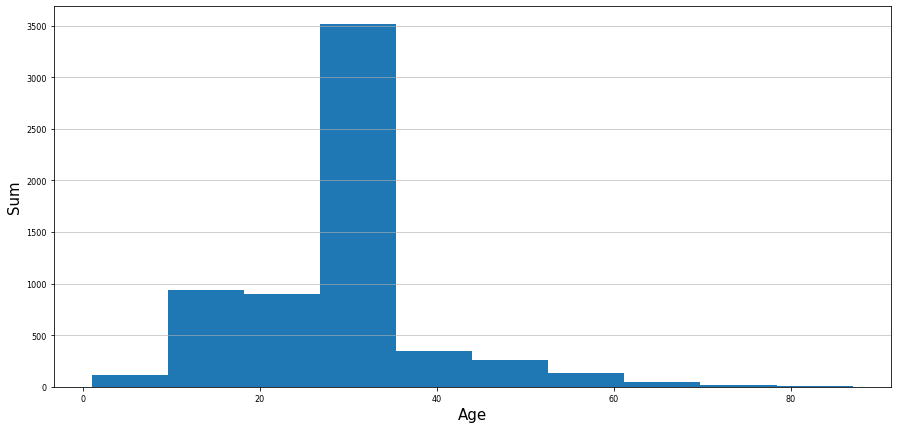

In [38]:
plt.figure(figsize=[15,7])
plt.hist(db['Age'])
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Sum',fontsize=15)
plt.grid(axis='y', alpha=0.75)

In [39]:
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)

0


In [40]:
db.describe(include = 'O').transpose()

,count,unique,top,freq
Case Number,6275,6259,1920.00.00.b,2
Date,6275,5409,1957,11
Type,6271,8,Unprovoked,4579
Country,6225,204,USA,2222
Area,5824,816,Florida,1035
...,...,...,...,...
Investigator or Source,6258,4955,"C. Moore, GSAF",100
pdf,6275,6264,1921.11.27.a-b-Jack.pdf,2
href formula,6274,6263,http://sharkattackfile.net/spreadsheets/pdf_di...,2
Case Number.1,6275,6259,1920.00.00.b,2


## Sex column

In [41]:
db[db['Sex']==0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order


In [42]:
null_rows_Sex = db['Sex'].isnull().sum()
print(null_rows_Sex)

561


In [43]:
#Print set of different values
set(db['Sex'])

{'.', 'F', 'M', 'N', 'lli', nan}

In [44]:
db['Sex']=db['Sex'].replace(['.', 'lli', 'N'], 'U')
#db['Sex'] = db['Sex'].fillna('U')

In [45]:
set(db['Sex'])

{'F', 'M', 'U', nan}

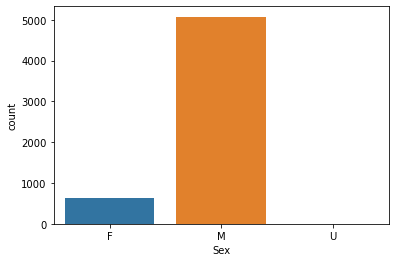

In [46]:
sns.countplot(x=db.Sex)

In [47]:
db[(db["Sex"] != db["Name"]) & (db["Sex"]).isna()]["Name"]

32                                                    NaN
59                                            31 migrants
86                                                    NaN
124                                                   NaN
154                                                   NaN
                              ...                        
6212    4.8-metre skiboat, Occupants: Rod Salm & 4 fri...
6237                                                  NaN
6259                                                   C.
6278                                                  NaN
6287                                           20 Fijians
Name: Name, Length: 561, dtype: object

In [48]:
set(db['Sex'])

{'F', 'M', 'U', nan}

## Fatal (Y/N)

In [49]:
set(db['Fatal (Y/N)'])

{'2017', 'M', 'N', 'UNKNOWN', 'Y', nan, 'y'}

In [51]:
db['Fatal (Y/N)'] = db['Fatal (Y/N)'].str.replace('y', 'Y')
db['Fatal (Y/N)']=db['Fatal (Y/N)'].replace(['2017','UNKNOWN','M'], 'U')
#db['Fatal (Y/N)'] = db['Fatal (Y/N)'].fillna('U')

In [52]:
# This is a list with the indexes of the rows which have NaN values in the column "Fatal"
rows_missing_FATAL = list(db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())].index)
len(rows_missing_FATAL)

528

In [53]:
def InjFatal (value):
    value=str(value)
    if "fatal" in value.lower():
        return True
    else:
        return False

In [54]:
db.Injury.map(InjFatal)

0       False
1       False
2       False
3       False
4       False
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: Injury, Length: 6275, dtype: bool

In [55]:
db[~db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()].loc[:,"Fatal (Y/N)"]="Y"
db

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,27,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,27,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,27,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,27,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [56]:
db[db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()]["Fatal (Y/N)"]="Y"
db

<ipython-input-56-1a52710b66d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[db['Injury'].map(InjFatal) & db["Fatal (Y/N)"].isnull()]["Fatal (Y/N)"]="Y"


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,27,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,27,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,27,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,27,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [57]:
#if db.Injury.map(InjFatal)==True and db["Fatal (Y/N)"]==None:
    #db["Fatal (Y/N)"]="Y"
#elif db["Fatal (Y/N)"]==None:
    #db["Fatal (Y/N)"]="N"       

In [58]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,27,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,27,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


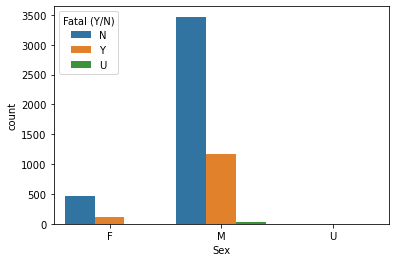

In [59]:
ax = sns.countplot(x="Sex", hue="Fatal (Y/N)", data=db)

## Type

In [60]:
set(db['Type'])

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [61]:
db['Type'] = db['Type'].fillna('Not confirmed')
db['Type'] = db['Type'].str.replace('Boating', 'Boat')
db['Type'] = db['Type'].str.replace('Boatomg', 'Boat')
db['Type'] = db['Type'].str.replace('Invalid', 'Not confirmed')
db['Type'] = db['Type'].str.replace('Questionable', 'Not confirmed')

In [62]:
set(db['Type'])

{'Boat', 'Not confirmed', 'Provoked', 'Sea Disaster', 'Unprovoked'}

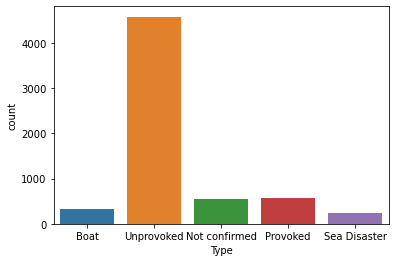

In [63]:
ax = sns.countplot(x="Type", data=db)

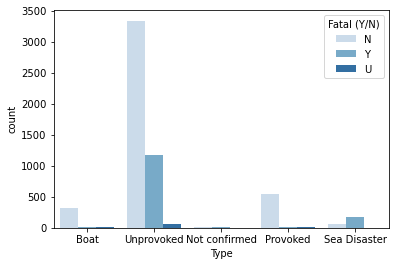

In [64]:
sns.countplot(x=db.Type,
              hue=db['Fatal (Y/N)'],
              palette="Blues")

## . Country

In [65]:
set(db['Country'])

{'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GABON',
 'GEORGIA'

In [66]:
db['Country']=db['Country'].replace(['MALDIVAS'],'MALDIVES')
db['Country']=db['Country'].replace(['INDIAN OCEAN?'],'INDIAN OCEAN')
db['Country']=db['Country'].replace(['ANDAMAN / NICOBAR ISLANDAS'], 'ANDAMAN ISLANDS')
db['Country']=db['Country'].replace(['Fiji'], 'FIJI')
db['Country']=db['Country'].replace(['RED SEA?','READ SEA / INDIAN OCEAN'], 'READ SEA')
db['Country']=db['Country'].replace(['ST. MAARTIN'], 'ST. MARTIN')
db['Country']=db['Country'].replace(['SUDAN?'], 'SUDAN')
db['Country']=db['Country'].replace(['UNITED ARAB EMIRATES (UAE)'], 'UNITED ARAB EMIRATES')
db['Country']=db['Country'].replace(['WESTERN SAMOA'], 'SAMOA')
db['Country']=db['Country'].replace(['TOBAGO'], 'TRINIDAD & TOBAGO')
db['Country']=db['Country'].replace(['SOLOMON ISLANDS / VANUATU'], 'SOLOMON ISLANDS')
db['Country']=db['Country'].replace(['ST HELENA, British overseas territory'], 'ST HELENA')
db['Country']=db['Country'].replace(['MALDIVE ISLANDS'], 'MALDIVAS')
db['Country']=db['Country'].replace(['READ SEA','RED SEA / INDIAN OCEAN'], 'RED SEA')
db['Country']=db['Country'].replace(['Coast of AFRICA'], 'AFRICA')
db['Country']=db['Country'].replace(['France'], 'FRANCE')
db['Country']=db['Country'].replace(['Mozambique'], 'MOZAMBIQUE')
db['Country']=db['Country'].replace(['REUNION ISLAND'], 'REUNION')

In [67]:
Countries_max=db.Country.value_counts()
Countries_max.head(15)

USA                 2222
AUSTRALIA           1335
SOUTH AFRICA         577
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               111
BAHAMAS              109
MEXICO                88
ITALY                 68
FIJI                  65
PHILIPPINES           62
REUNION               61
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            44
Name: Country, dtype: int64

In [68]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis
4266,NaN,Between Comores & Madagascar,Geyser Bank
4498,NaN,Caribbean Sea,Between Cuba & Costa Rica
5020,NaN,French Southern Territories,Île Saint-Paul
6137,NaN,St Helena,Landing Place


In [69]:
rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
rows_missing_Countries

[3387, 4266, 4498, 5020, 6137]

In [70]:
input_Countries= ["Saint Kitts and Nevis", "Mozambique", "Cuba", "France", "ST HELENA"]

In [71]:
def filling(data, indexes, values, col_name):
    j=0
    for i in indexes:   
        db.at[ i, col_name] = values[j]
        j = j+1

In [72]:
filling(db, rows_missing_Countries, input_Countries, "Country")

In [73]:
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [74]:
db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)][["Country", "Area", "Location"]]


,Country,Area,Location
3605,NaN,NaN,Florida Strait
4639,NaN,NaN,225 miles east of Hong Kong
5425,NaN,NaN,Near the equator
5810,NaN,NaN,Santa Cruz
6155,NaN,NaN,Carlisle Bay
6206,NaN,NaN,In a river feeding into the Bay of Bengal


In [75]:
rows_missing_Countries2 = list(db[(db.Country.isna()) & (db.Area.isna()) & (db.Location.isna()==False)].index)
rows_missing_Countries2

[3605, 4639, 5425, 5810, 6155, 6206]

In [265]:
input_Countries2= ["USA", "CHINA", " ", "USA", "ANTIGUA", "INDIA"]
filling(db, rows_missing_Countries2, input_Countries2, "Country")
db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [266]:
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

,Country,Area,Location


In [76]:
rows_missing_Countries3 = list(db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())].index)
rows_missing_Countries3

[2956, 4018, 4231, 4700, 4712, 5612, 5742, 5808, 6175, 6177]

In [77]:
input_Countries3= ["", "AUSTRALIA", "INDIA","USA","VIRGIN ISLANDS","SPAIN", "USA","","SICILIA","SICILIA"]
filling(db, rows_missing_Countries3, input_Countries3, "Country")
db[(db.Country.isna()) & (db.Area.isna()==False) & (db.Location.isna())][["Country", "Area", "Location"]]

,Country,Area,Location


In [78]:
null_cols(db['Country'])

array([0.55776892])

In [86]:
rows_missing_Countries = list(db[(db.Country.isna()) & (db.Area.isna()== False) & (db.Location.isna()==False)].index)
rows_missing_Countries

[]

## Year

In [112]:
print(db['Year'].dtypes)

float64


In [113]:
len(db[db['Year']==0])

0

In [114]:
len(db[db['Year']>2000])

1959

In [115]:
db=db[db['Year']>=2000]
db

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302
2,2018.06.09,09-Jun-2018,2018,Not confirmed,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,27,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,27,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,2000.03.26,26-Mar-2000,2000,Unprovoked,USA,Florida,"Juno Beach, Palm Beach County",Boogie boarding,Heather Van Olst,F,14,Right knee lacerated,N,11h15,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",2000.03.26-VanOlst.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.26,2000.03.26,4241
2063,2000.03.24,24-Mar-2000,2000,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Barry Pasonski,M,37,Left hand bitten,N,14h00,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",2000.03.24-Pasonski.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.24,2000.03.24,4240
2064,2000.03.15,15-Mar-2000,2000,Unprovoked,NEW CALEDONIA,North Province,Poum,Spearfishing,Gilbert Bui Van Minh,M,35,FATAL,Y,Morning,Tiger shark?,"Les Nouvelles Caledoniennes, 3/16/2000",2000.03.15-GilbertBui.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.15,2000.03.15,4239
2065,2000.03.14,14-Mar-2000,2000,Unprovoked,AUSTRALIA,New South Wales,"McMasters Beach, Central Coast",Surfing,Craig Ruth,M,27,No Injury,N,19h30,"Tiger shark, 4 m [13'] ?","Sydney Morning Herald, 3/16/2000",2000.03.14-Ruth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.14,2000.03.14,4238


In [116]:
db.isnull().sum()

Case Number       0
Date              0
Year              0
Type              0
Country           2
                 ..
pdf               0
href formula      0
Case Number.1     0
Case Number.2     0
original order    0
Length: 21, dtype: int64

In [117]:
#db["Year"]=pd.Series([round(val,0) for val in db["Year"]])

In [119]:
db.Year.apply(np.round)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2062    2000
2063    2000
2064    2000
2065    2000
2066    2000
Name: Year, Length: 2055, dtype: float64

In [120]:
pd.set_option('precision', 0)

In [122]:
db.sort_values(by='Year',ascending=True)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
2066,2000.03.10,10-Mar-2000,2000,Boat,AUSTRALIA,New South Wales,Parramatta River,Rowing,boat of Scot's College rowers,NaN,27,No Injury to occupants,N,P.M.,2 m to 2.5 m [6.75' to 8.25'] shark,"Sydney Morning Herald,",2000.03.10-rowers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.03.10,2000.03.10,4237
1996,2000.10.20,20-Oct-2000,2000,Unprovoked,USA,Florida,"Fort Pierce Inlet State Park, St Lucie County",Surfing,Jason Licamele,M,23,Leg lacerated,N,18h00,NaN,"Stuart News, 10/21/2000",2000.10.20-Licamele.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.10.20,2000.10.20,4307
1997,2000.10.18,18-Oct-2000,2000,Unprovoked,USA,Hawaii,Olowalu,Swimming / snorkeling,Henrietta Musselwhite,F,56,Right side of back / torso lacerated,N,11h20,"Tiger shark, 1.8 m to 2.4 m [6' to 8']",GSAF,2000.10.18-Musselwhite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.10.18,2000.10.18,4306
1998,2000.10.14,14-Oct-2000,2000,Unprovoked,USA,Florida,"South Beach, Sebastian, Indian River County",Swimming,Norman Payne,M,69,Right hand lacerated,N,15h30,NaN,"D. Robinson, Vero Beach Press Journal, 10/17/2...",2000.10.14-Payne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.10.14,2000.10.14,4305
1999,2000.10.09,09-Oct-2000,2000,Unprovoked,USA,Florida,"Lake Worth Inlet/West Palm Beach, Palm Beach C...",Surfing,Matt Kraskiewicz,M,17,Foot lacerated,N,Morning,2.1 to 2.4 m [7' to 8'] shark,"South Florida Sun-Sentinel, 10/11/2000",2000.10.09-Kraskiecwicz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.10.09,2000.10.09,4304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2018.04.15.a,15-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,Alejandro Travaglini,M,37,Lacerations to legs,N,08h00,NaN,"B.Myatt, GSAF",2018.04.15.a-Travaglini.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.a,2018.04.15.a,6274
28,2018.04.15.b,15-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders, Margaret River Area",Surfing,Jason Longrass,M,41,Laceration to right thigh,N,NaN,NaN,"B.Myatt, GSAF",2018.04.15.b-Longrass.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.b,2018.04.15.b,6275
27,2018.04.15.c,15-Apr-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276
25,2018.04.19,19-Apr-2018,2018,Unprovoked,USA,Hawaii,"Shipwreck’s Beach, Keoneloa Bay, Kauai",Body boarding,Dylan McWilliams,M,29,Lacerations to right lower leg,N,NaN,6' shark,"The Garden Island, 4/19/2018",2018.04.19-McWilliams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.19,2018.04.19,6278


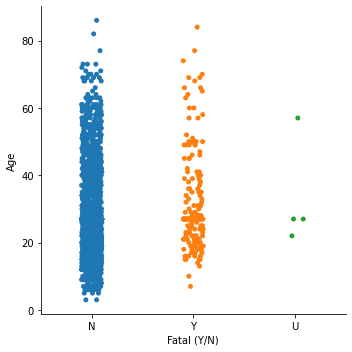

In [123]:
sns.catplot(x="Fatal (Y/N)", y="Age", data=db)

In [124]:
#columna agrupacion.columna cálculo
print(db.groupby(by="Country")["Age"].mean())

Country
ANTIGUA           27
ARUBA             58
ATLANTIC OCEAN    27
AUSTRALIA         31
AZORES            38
                  ..
USA               28
VANUATU           17
VENEZUELA         30
VIETNAM           37
YEMEN             27
Name: Age, Length: 93, dtype: float64


export to csv

In [277]:
db.to_csv("shark_final.csv")